In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dm = pd.read_csv('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Output/Submission/DM/data/653.csv')

# get a 10 random features and select them from columns and rows
fts = dm.columns
random_fts = np.random.choice(fts, 10, replace=False)

dm.reset_index()
dm.rename(columns={'Unnamed: 0':'Feature'}, inplace=True)
print(dm.shape)

# get index of the selected features
idx = []
for ft in random_fts:
    idx.append(dm[dm['Feature'] == ft].index[0])

# get the selected features
dm = dm.iloc[idx, :]
print(dm.shape)
dm = dm.drop(columns=['Feature'])
# select only cols with features
dm = dm[random_fts]

print(dm.shape)


(72, 73)
(10, 73)
(10, 10)


In [4]:


dm_vals = dm.values

In [5]:
dm_vals

array([[0.        , 0.48658908, 0.89210738, 0.25530403, 1.33653038,
        0.12139546, 0.96459905, 0.22192577, 1.57084181, 1.33826429],
       [0.48658908, 0.        , 0.69004672, 0.5093083 , 0.88560118,
        0.53761954, 0.71316134, 0.46617482, 1.17730049, 0.96928773],
       [0.89210738, 0.69004672, 0.        , 0.73350335, 0.76632607,
        0.88152512, 0.10622493, 0.88384454, 0.80625153, 0.55100776],
       [0.25530403, 0.5093083 , 0.73350335, 0.        , 1.26933015,
        0.17584193, 0.81350624, 0.25256566, 1.46846122, 1.20789553],
       [1.33653038, 0.88560118, 0.76632607, 1.26933015, 0.        ,
        1.36751458, 0.67285176, 1.29814235, 0.40413926, 0.39149229],
       [0.12139546, 0.53761954, 0.88152512, 0.17584193, 1.36751458,
        0.        , 0.95878427, 0.18206173, 1.59120059, 1.34243089],
       [0.96459905, 0.71316134, 0.10622493, 0.81350624, 0.67285176,
        0.95878427, 0.        , 0.94999693, 0.70525148, 0.44765998],
       [0.22192577, 0.46617482, 0.8838445

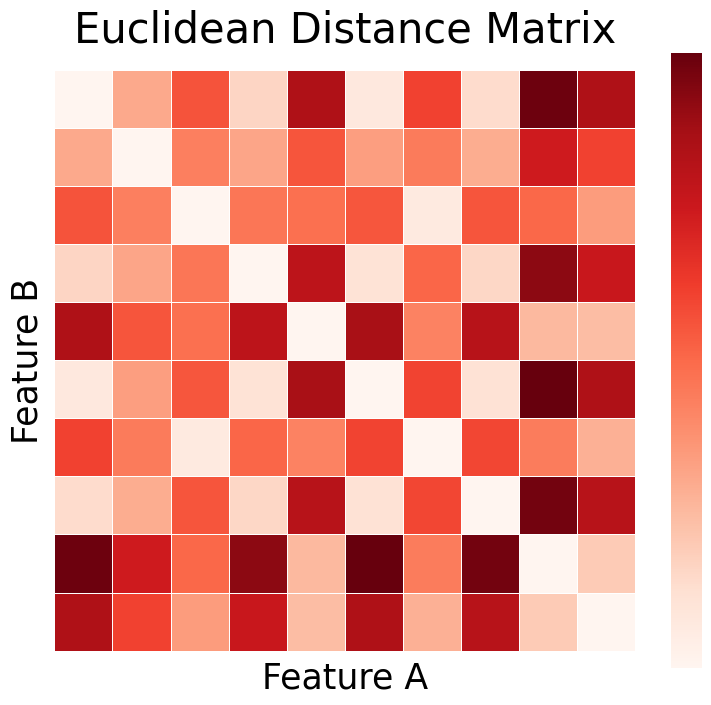

In [11]:
# plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(dm_vals, cmap='Reds', square=True, annot=False, cbar=True, vmin=0,
            cbar_kws={'shrink':0.8, 'label': 'Euclidean Distance'}, edgecolor='black', linewidth=0.5)
# change fontsize of colorbar title
plt.gcf().axes[-1].yaxis.label.set_size(15)

plt.title('Euclidean Distance Matrix', fontsize=30, pad=20)
plt.xlabel('Feature A', fontsize=25)
plt.ylabel('Feature B', fontsize=25)


# turn off ticks on cbar
plt.gcf().axes[-1].yaxis.set_visible(False)


# turn off ticks
plt.xticks([])
plt.yticks([])

#plt.xticks(ticks=xticks_new, labels=xticks_labels, rotation=-30, fontsize=8)
#plt.yticks(ticks=yticks_new, labels=yticks_labels, rotation=0, fontsize=8)
#plt.xticks(ticks=np.arange(0.5, len(dm.columns), 1), labels=dm.columns, rotation=90, fontsize=6)
#plt.yticks(ticks=np.arange(0.5, len(dm.columns), 1), labels=dm.columns, rotation=0, fontsize=6)
plt.tight_layout()
plt.savefig('./ED_All_Features.png', dpi=300)